# Inspect Extracted Noise

We extract "noise" in the `seasonal-decomposition` step. 
Here we analyse it via a **scatter matrix** to inspect correlations with the features.

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
root = Path(r"..\data\us_arm_fede")

df_noise = pd.read_pickle(root / "data\postprocessed" / "kc_noise.pickle").to_frame().reset_index()
df_noise.rename(columns={'resid': "Residual"}, inplace=True)
df_noise.index

RangeIndex(start=0, stop=2172, step=1)

## Scatter Plotting Noise

<AxesSubplot:>

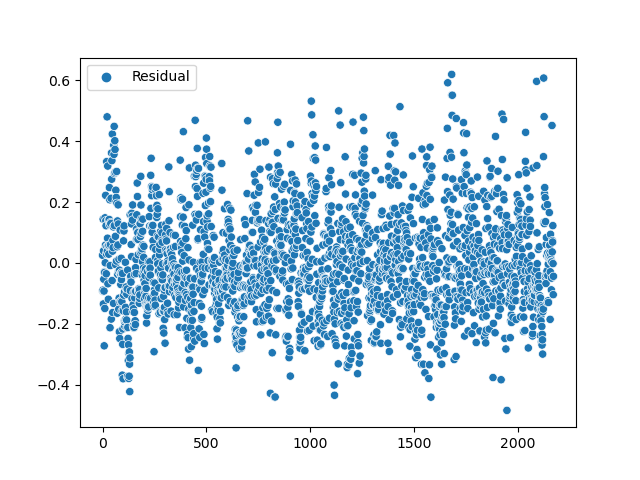

In [3]:
sns.scatterplot(df_noise)

### Noise colored by Day of Month

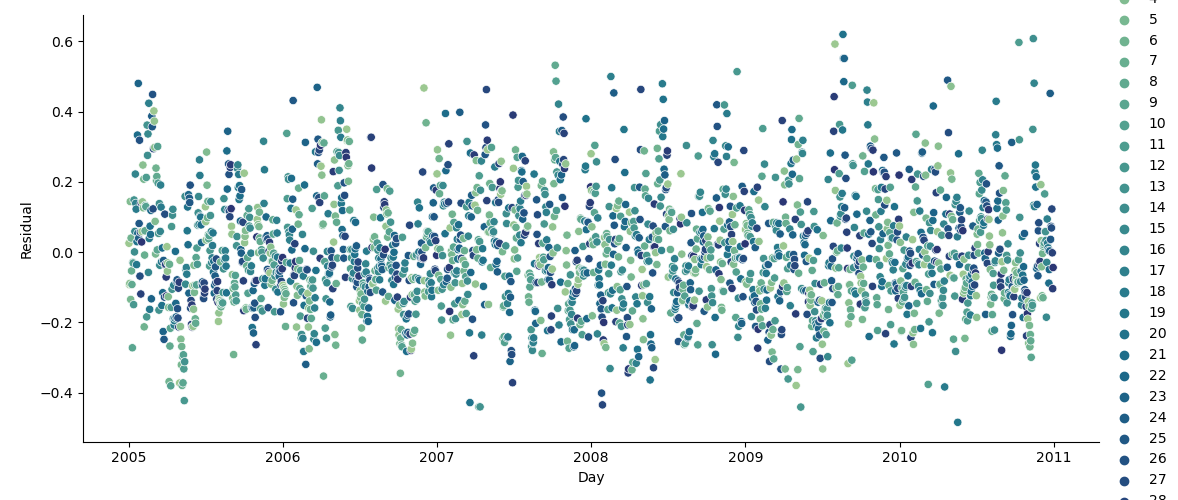

In [4]:
sns.relplot(df_noise, x="Day", y="Residual", kind="scatter", 
            hue=df_noise.apply(lambda x: str(x.loc["Day"].day), axis=1), palette="crest", 
            aspect=20/9)

*There is no evident pattern emerging from this figure, only that, **in Winter, values are more spread***.

## Correlation with Features

### Read Features Data

In [7]:
features_used = ["Rs", "Uwind", "Tmin", "Tmax", "DOY", "ETo"] 
df_fts = pd.read_pickle(root / "data/raw/data.pickle").loc[:, features_used].reset_index()
df_fts

,Day,Rs,Uwind,Tmin,Tmax,DOY,ETo
0,2005-01-01,4938012.0,-0.17,286.41,292.36,1.0,1.68
1,2005-01-02,2752644.0,0.50,283.60,290.63,2.0,1.24
2,2005-01-03,2119620.0,0.28,276.86,283.07,3.0,1.02
3,2005-01-04,678888.0,-1.38,274.22,276.66,4.0,0.62
4,2005-01-05,3091380.0,0.87,267.29,274.25,5.0,0.86
...,...,...,...,...,...,...,...
2186,2010-12-27,10758740.0,-1.62,268.46,280.31,361.0,1.55
2187,2010-12-28,7968248.0,0.32,270.84,280.69,362.0,1.08
2188,2010-12-29,4652320.0,-1.08,274.97,288.26,363.0,2.16
2189,2010-12-30,10788532.0,1.01,284.59,293.43,364.0,3.68


### Merge with Noise Data

In [8]:
df = df_fts.merge(df_noise, on="Day")
df.head()

,Day,Rs,Uwind,Tmin,Tmax,DOY,ETo,Residual
0,2005-01-01,4938012.0,-0.17,286.41,292.36,1.0,1.68,0.025293
1,2005-01-02,2752644.0,0.50,283.60,290.63,2.0,1.24,-0.092652
2,2005-01-03,2119620.0,0.28,276.86,283.07,3.0,1.02,-0.089166
3,2005-01-04,678888.0,-1.38,274.22,276.66,4.0,0.62,0.144009
4,2005-01-05,3091380.0,0.87,267.29,274.25,5.0,0.86,-0.134818


### Plot Correlations

In [11]:
df_melted = df.melt(id_vars=["Residual"], var_name="Feature")
df_melted

,Residual,Feature,value
0,0.025293,Day,2005-01-01 00:00:00
1,-0.092652,Day,2005-01-02 00:00:00
2,-0.089166,Day,2005-01-03 00:00:00
3,0.144009,Day,2005-01-04 00:00:00
4,-0.134818,Day,2005-01-05 00:00:00
...,...,...,...
15199,0.068807,ETo,1.55
15200,0.122769,ETo,1.08
15201,-0.002053,ETo,2.16
15202,-0.104145,ETo,3.68


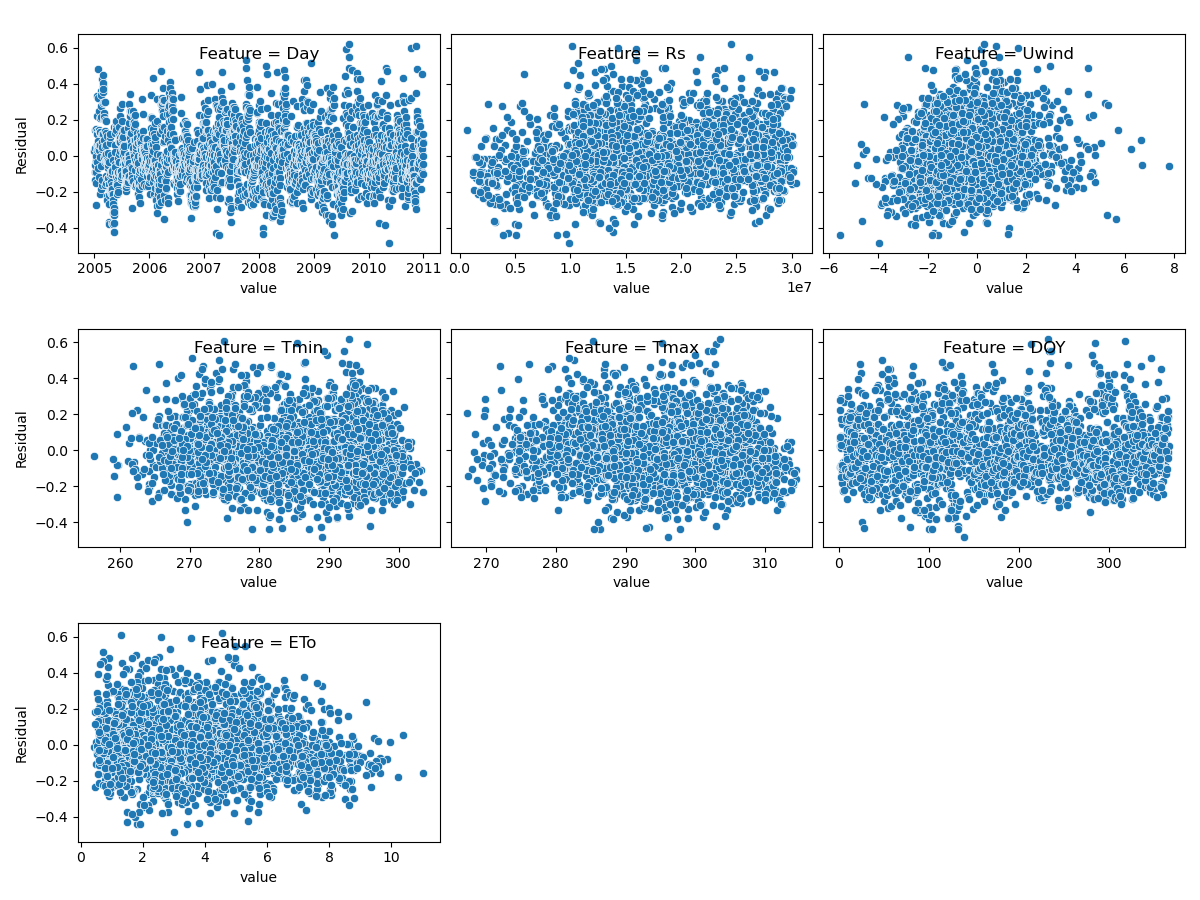

In [10]:
def plot_correlation(data, x, y):
    g = sns.relplot(data, x=x, y=y, 
                    col="Feature", col_wrap=3, 
                    facet_kws={"sharey":True, "sharex":False}, height=3, aspect=4/3)
    # for i, f in enumerate(features_used):
    #     g.axes[i].set_xlabel(f)

    # Draw lines for the upper and right sides of each axis
    for ax in g.axes.flat:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)

    # Adjust the titles of each subplot
    for ax in g.axes.flat:
        ax.set_title(ax.get_title(), y=.85)  # Adjust the y value as needed

    g.fig.subplots_adjust(wspace=0.03)

    plt.show()
    return g

plot_correlation(df_melted, "value", "Residual")